In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, train_test_split

In [3]:
data1 = pd.read_csv(r'C:\Users\kimpo\Downloads\archive\Twitter_Data.csv')

In [4]:
data1.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
data1

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [6]:
data1.dropna(subset=["clean_text"],inplace=True)

In [7]:
negative=data1[data1.category==-1].shape[0] 
neutral=data1[data1.category==0].shape[0]
positive=data1[data1.category==1].shape[0]

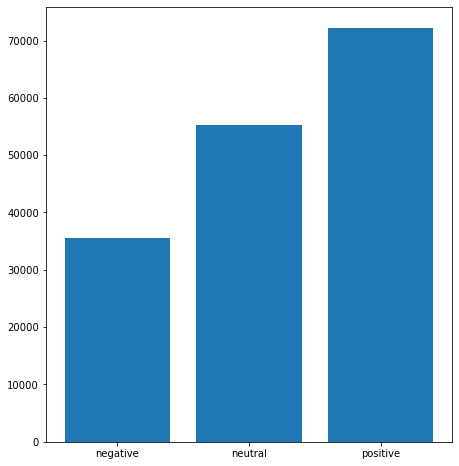

In [8]:
plt.figure(1,figsize=(16,8))
plt.subplot(1,2,1)
_= plt.bar(["negative","neutral","positive"],[negative,neutral,positive])

In [9]:
def plot_category_based_features(feature):
  x1=data1[data1.category==-1][feature]
  x2=data1[data1.category==0][feature]
  x3=data1[data1.category==1][feature]
  plt.figure(1,figsize=(16,8))
  plt.subplot(1,1,1)
  _=plt.hist(x3, alpha=0.5,color="red",bins=50)
  _=plt.hist(x2, alpha=0.7,color="grey",bins=50)
  _=plt.hist(x1, alpha=0.9,color="blue",bins=50)
  return _

In [10]:
data1["text_len"]=data1.clean_text.map(lambda x: len(x))

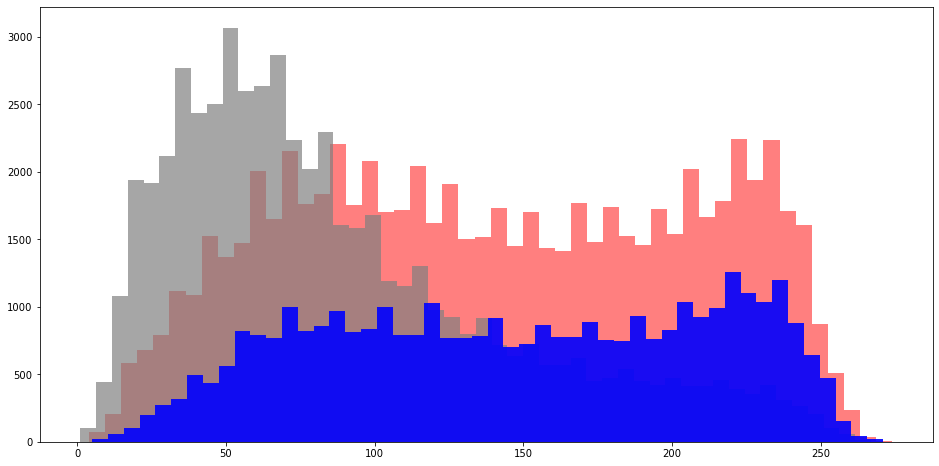

In [11]:
_ = plot_category_based_features("text_len")

In [12]:
data1.head()

,clean_text,category,text_len
0,when modi promised “minimum government maximum...,-1.0,210
1,talk all the nonsense and continue all the dra...,0.0,68
2,what did just say vote for modi welcome bjp t...,1.0,117
3,asking his supporters prefix chowkidar their n...,1.0,212
4,answer who among these the most powerful world...,1.0,81


In [13]:
data1["words_count"] = data1.clean_text.str.split().map(lambda x: len(x))

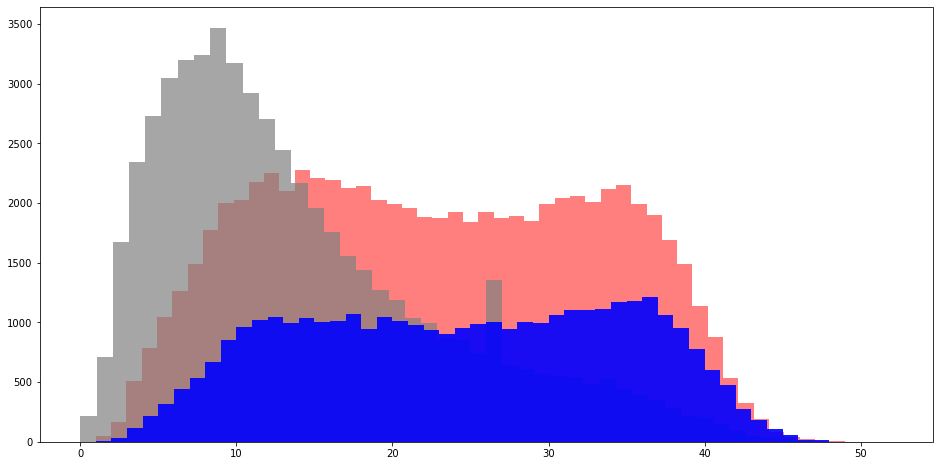

In [14]:
_ = plot_category_based_features("words_count")

In [15]:
data1["unique_word_count"] = data1.clean_text.map(lambda x: len(set(str(x).split())))

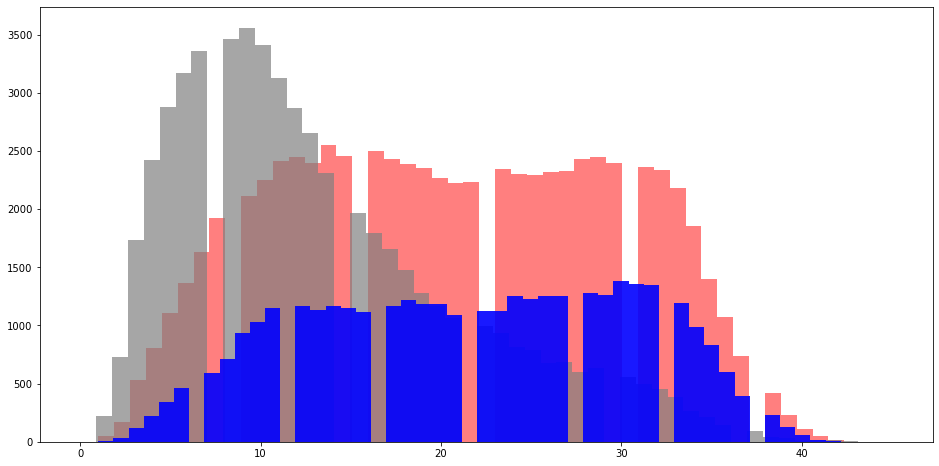

In [16]:
_ = plot_category_based_features("unique_word_count")

In [17]:
data1["mean_word_length"] = data1.clean_text.map(
    lambda x: np.mean([len(w) for w in str(x).split()])
)

C:\Users\kimpo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kimpo\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C:\Users\kimpo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kimpo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


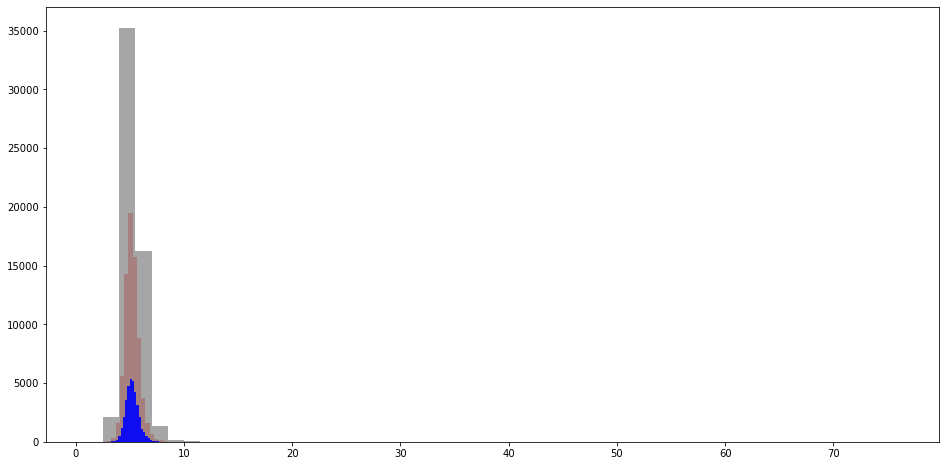

In [18]:
_ = plot_category_based_features("mean_word_length")

In [19]:
data1.columns

Index(['clean_text', 'category', 'text_len', 'words_count',
       'unique_word_count', 'mean_word_length'],
      dtype='object')

In [20]:
from nltk.corpus import stopwords

In [21]:
from wordcloud import WordCloud, STOPWORDS

In [22]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(tweet for tweet in data1.clean_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)


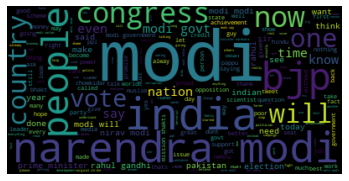

In [23]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [28]:
negative=data1[data1.category==-1]
neutral=data1[data1.category==0]
positive=data1[data1.category==1]

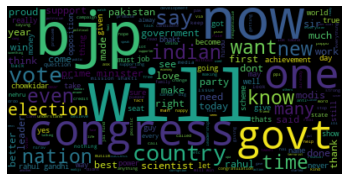

In [36]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great","india","modi","people","narendra"])  
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.clean_text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

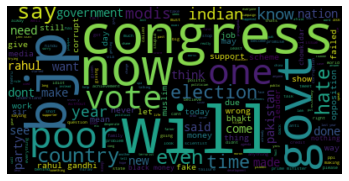

In [37]:
neg = " ".join(review for review in negative.clean_text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

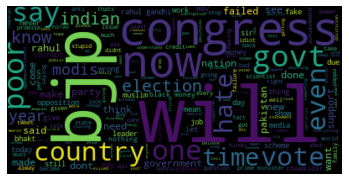

In [38]:
neu = " ".join(review for review in neutral.clean_text)
wordcloud4 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud44.png')
plt.show()

# Data cleaning

In [40]:
data1 = data1.dropna()

In [41]:
tweets = list(data1['clean_text']) 
classes = []

for r in data1["category"]:
    if  r == -1:
        classes.append("Negative")
    if  r == 0:
        classes.append("Neutral")
    if  r == 1:
        classes.append("Positive")
    if r != 0 and r!= 1 and r != -1:
          print(r)
    
base = pd.DataFrame({"tweet": tweets, "category": classes})
base
tweets = base["tweet"]
classes = base['category']

In [42]:
def Preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    data = re.sub(r"http\S+", "", data).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    words = [stemmer.stem(i) for i in data.split() if not i in stopwords]
    return (" ".join(words))

tweets = [Preprocessing(i) for i in tweets]

In [67]:
data1['clean_text']=data1['clean_text'].apply(Preprocessing)

<ipython-input-67-187bbb1bd8d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['clean_text']=data1['clean_text'].apply(Preprocessing)


In [62]:
d = {'tweets':tweets,'classes':classes}
df = pd.DataFrame(d)

In [63]:
df.head()

,tweets,classes
0,mod promised “minimum government maximum gover...,Negative
1,talk nonsens continu dram vot mod,Neutral
2,say vot mod welcom bjp told rahul main campaig...,Positive
3,asking support prefix chowkid nam mod great se...,Positive
4,answ among powerful world lead today trump put...,Positive


In [64]:
index = data1.index
data1['random_number'] = np.random.randn(len(index))
train = data1[data1['random_number'] <= 0.8]
test = data1[data1['random_number'] > 0.8]

<ipython-input-64-344412b81705>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['random_number'] = np.random.randn(len(index))


In [68]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets_train = vectorizer.fit_transform(train.clean_text)
freq_tweets_test = vectorizer.transform(test.clean_text)

In [69]:
X_train = freq_tweets_train
X_test = freq_tweets_test
y_train = train['category']
y_test = test['category']

In [70]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [71]:
predictions = model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report

In [74]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

        -1.0       0.62      0.77      0.68      6097
         0.0       0.62      0.92      0.74      7954
         1.0       0.93      0.69      0.79     20627

    accuracy                           0.76     34678
   macro avg       0.72      0.79      0.74     34678
weighted avg       0.80      0.76      0.76     34678



In [75]:
import pickle

In [76]:
#Save the model to file in the current working directory
Pkl_Filename = "PredictionsCategory.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(predictions, file)